# Jurnal Modul 1

# # Nomor 1: Histogram Clipping, & Normalisasi

# Import Library

In [118]:
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import numpy as np

Code di atas merupakan proses mengimpor Library yang akan digunakan terdapat “matplotlib.pyplot as plt” digunakan untuk membuat visualisasi seperti grafik dan plot. “cv2 as cv” digunakan untuk berbagai keperluan seperti pemrosesan citra, deteksi objek, dan visi komputer lainnya. “pandas as pd” digunakan untuk analisis dan manipulasi data. Ini menyediakan struktur data dan fungsi untuk dengan mudah mengelola dan menganalisis data tabular. Biasanya digunakan untuk membaca data dari berbagai format file, seperti CSV, Excel, SQL, dll., dan juga untuk manipulasi data seperti pengindeksan, pemfilteran, penggabungan, dan banyak lagi. Dan yang terakhir yaitu “numpy as np” Library Ini menyediakan struktur data array multidimensi, serta koleksi dari fungsi-fungsi matematika yang kuat untuk berbagai jenis operasi numerik. 

# Membaca dan Menampilkan Gambar

[[[218 147 151]
  [172 101 105]
  [184 114 116]
  ...
  [ 30  13  19]
  [ 37  22  27]
  [ 26  11  16]]

 [[213 142 146]
  [164  93  97]
  [175 105 107]
  ...
  [ 39  22  28]
  [ 48  31  37]
  [ 33  18  23]]

 [[211 140 144]
  [159  88  92]
  [171 101 103]
  ...
  [ 46  27  33]
  [ 57  38  44]
  [ 37  20  26]]

 ...

 [[144 137 215]
  [127 120 198]
  [126 119 197]
  ...
  [ 83  70 149]
  [ 83  70 149]
  [ 84  71 150]]

 [[144 137 215]
  [127 120 198]
  [127 120 198]
  ...
  [ 83  70 149]
  [ 83  70 149]
  [ 83  70 149]]

 [[145 138 216]
  [129 122 200]
  [129 122 200]
  ...
  [ 82  69 148]
  [ 82  69 148]
  [ 82  69 148]]]


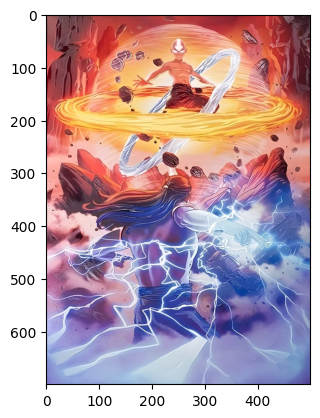

In [119]:
image = plt.imread("aang.jpg")
plt.imshow(image)
print(image)

image "aang.jpg" dibaca menggunakan fungsi img.imread() yang dimuat dari library Matplotlib. Fungsi tersebut akan mengembalikan sebuah array NumPy yang merepresentasikan citra digital.
lalu setelah dibaca citra tersebut ditampilkan menggunakan fungsi plt.imshow() yang juga dimuat dari library Matplotlib. Fungsi ini akan menampilkan citra digital pada sebuah jendela gambar.

# Mengubah Gambar Menjadi Grayscale 

[[156 110 123 ...  17  25  14]
 [151 102 114 ...  26  35  21]
 [149  97 110 ...  31  42  24]
 ...
 [161 144 143 ...  95  95  96]
 [161 144 144 ...  95  95  95]
 [162 146 146 ...  94  94  94]]


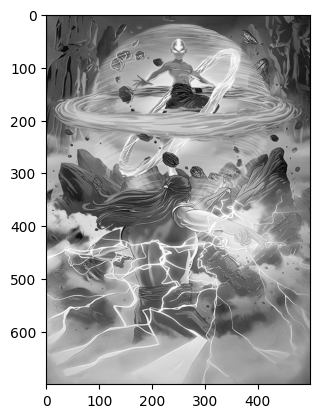

In [120]:
grayimage = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(grayimage,cmap="gray")
print(grayimage)

kode diatas melakukan konversi citra warna ke citra grayscale menggunakan fungsi cvtColor() dari library OpenCV, lalu menampilkan citra grayscale dengan menggunakan fungsi imshow() dari library Matplotlib dan menggunakan cmap='gray' untuk menampilkan citra grayscale

# Normalisasi, Menghitung dan menampilkan histogram


<BarContainer object of 256 artists>

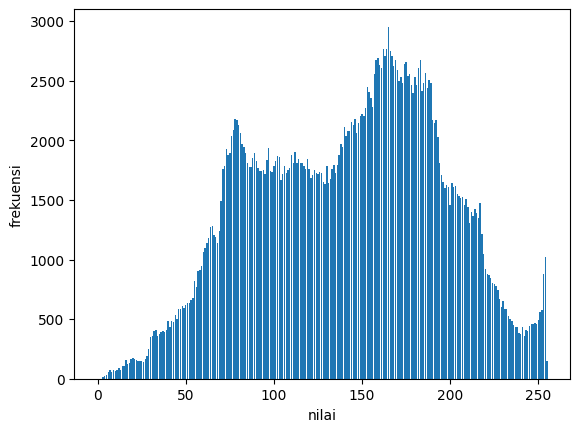

In [121]:
height, width = grayimage.shape
arr =[i for i in range(256)]
sumGray = np.zeros([256])
res = np.zeros([256]).astype(int)

for i in range(height):
    for j in range (width):
        sumGray = grayimage[i,j]
        res[sumGray]+=1

plt.xlabel("nilai")
plt.ylabel("frekuensi")
plt.bar(arr,res)  

kode diatas melakukan normalisasi, menghitung dan menampilkan histogram dari citra skala keabuan

<function matplotlib.pyplot.show(close=None, block=None)>

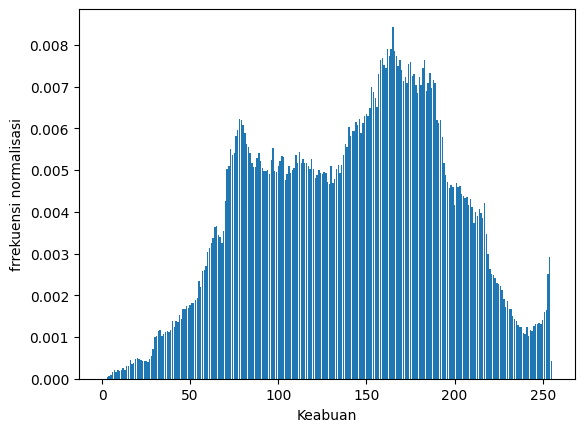

In [122]:
plt.bar(arr,res/(height*width))
plt.xlabel("Keabuan") 
plt.ylabel("frrekuensi normalisasi") 
plt.show

kode diatas menampilkan histogram normalisasi dari citra skala keabuan. Histogram normalisasi menggambarkan distribusi intensitas keabuan relatif terhadap jumlah total piksel dalam gambar, sehingga nilainya akan berada dalam rentang antara 0 dan 1.

# Nomor 2: Konvolusi


melakukan Element Kedua yaitu normalisasi dengan menerapkan konvolusi menggunakan kernel yang disediakan dengan zero padding. 

<h3>Kernel


In [132]:
kernel = np.array([[1, 2, -1, 1],
                   [0, 2, 1, 2],
                   [2, 1, 1, 0],
                   [1, 0, -1, 0]])

print(kernel)

height, width = kernel.shape

[[ 1  2 -1  1]
 [ 0  2  1  2]
 [ 2  1  1  0]
 [ 1  0 -1  0]]


kode diatas membuat sebuah kernel dengan ukuran 4x4 yang berisi nilai-nilai yang telah ditentukan pada soal. Pada kernel tersebut, setiap elemen mewakili bobot yang digunakan pada operasi konvolusi. Nilai bobot yang lebih besar menunjukkan bahwa nilai pixel pada area tersebut memiliki pengaruh yang lebih besar pada hasil konvolusi. lalu mengambil ukuran kernel dan menyimpannya pada dua variabel height dan width. Variabel height merepresentasikan jumlah baris pada kernel, sedangkan variabel width merepresentasikan jumlah kolom pada kernel.

In [124]:
img_tinggi, img_lebar = grayimage.shape
kernel_tinggi, kernel_lebar = kernel.shape

padding_size = int((kernel_tinggi - 1) / 2)
pad_width = ((padding_size, padding_size+1), (padding_size, padding_size+1))
padding_grayimage = np.pad(grayimage, pad_width, mode="constant")
zeroPadding = np.zeros((img_tinggi, img_lebar))

for i in range(zeroPadding.shape[0]):
    for j in range(zeroPadding.shape[1]):   
        subset = padding_grayimage[i:i + kernel_tinggi, j:j + kernel_lebar]
        weighted_subset = subset * kernel
        sum_of_weighted_subset = np.sum(weighted_subset)
        zeroPadding[i][j] = np.round(sum_of_weighted_subset)
print(zeroPadding)

[[ 824. 1142. 1024. ...  194.  179.  161.]
 [1108. 1460. 1312. ...  289.  280.  247.]
 [1083. 1418. 1260. ...  326.  325.  286.]
 ...
 [1233. 1809. 1737. ... 1140.  857.  859.]
 [1383. 1803. 1758. ... 1137.  850.  759.]
 [1084. 1199. 1183. ...  754.  472.  473.]]


Kode diatas melakukan operasi konvolusi pada citra menggunakan kernel sebelumnya. Pertama, kode mengambil grayimage dan kernel. Kemudian, menghitung ukuran padding yang diperlukan. kemudian, dipad dengan ukuran padding yang sesuai. Selanjutnya, melakukan iterasi melalui setiap piksel pada citra dengan melakukan perhitungan konvolusi pada setiap titik. Konvolusi dilakukan dengan mengambil subset citra yang sesuai dengan ukuran kernel, mengalikannya dengan kernel, dan kemudian menjumlahkan hasilnya. Hasil konvolusi tersebut dibulatkan dan disimpan dalam matriks nol (zeroPadding).


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


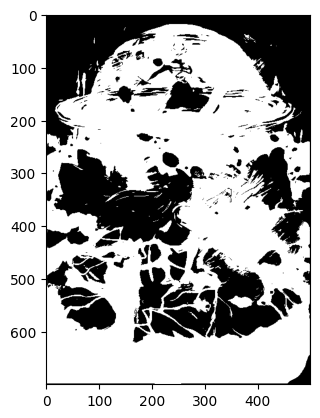

In [125]:
min = np.min(zeroPadding)
max = np.max(zeroPadding)
clipping = np.round((zeroPadding - min) / (max - min))
print(clipping)

plt.imshow(clipping,cmap="gray")

Kode diatas melakukan clipping pada citra hasil konvolusi. Nilai minimum dan maksimum dari citra dihitung, lalu dilakukan normalisasi nilai-nilai citra. Setelah itu, nilai-nilai tersebut dibulatkan dan hasilnya dicetak ke layar serta ditampilkan dalam bentuk citra menggunakan peta warna 'gray'.

# Nomor 3: Translasi & Rotasi

ROTASI = 40 | TRANSLASI = X : 300, Y : -163

<h3>Melakukan Rotasi sebanyak 40


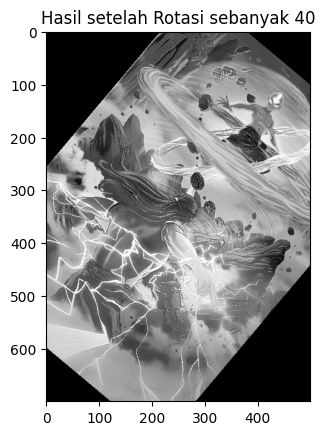

In [126]:
tinggi, lebar = grayimage.shape

rotasi = np.zeros((tinggi, lebar)).astype(int)

sudut_rotasi = np.deg2rad(-40)

cos = np.cos(sudut_rotasi)
sin = np.sin(sudut_rotasi)

tinggi_tengah = int((tinggi - 1) / 2)
lebar_tengah = int((lebar - 1) / 2)

for i in range(rotasi.shape[0]):
    for j in range(rotasi.shape[1]):
        x_rotasi = (i - tinggi_tengah) * cos + (j - lebar_tengah) * sin
        y_rotasi = -(i - tinggi_tengah) * sin + (j - lebar_tengah) * cos
        
        x_geser = int(x_rotasi + tinggi_tengah)
        y_geser = int(y_rotasi + lebar_tengah)
        
        if 0 <= x_geser < tinggi and 0 <= y_geser < lebar:
            rotasi[i][j] = grayimage[x_geser][y_geser]

plt.title("Hasil setelah Rotasi sebanyak 40")
plt.imshow(rotasi, cmap="gray")
plt.show()


Kode di atas melakukan rotasi citra sebesar -40 derajat secara manual. Sudut rotasi diubah menjadi radian, dan kemudian dilakukan perhitungan transformasi affine untuk setiap piksel dalam citra. Hasil rotasi ditampilkan menggunakan plt.imshow() dengan peta warna 'gray'.

<h3>Translasi Gambar yang telah di rotasi

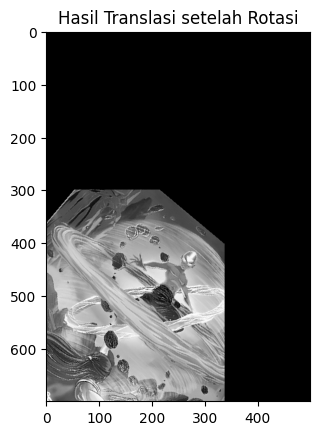

In [127]:
translasi = np.zeros((tinggi, lebar)).astype(int)

for i in range(tinggi):
    for j in range(lebar):
        x_translasi = i - 300
        y_translasi = j + 163
        
        if 0 <= x_translasi < tinggi and 0 <= y_translasi < lebar:
            translasi[i][j] = rotasi[x_translasi][y_translasi]

plt.title("Hasil Translasi setelah Rotasi")
plt.imshow(translasi, cmap="gray")
plt.show()

Kode tersebut di atas melakukan translasi pada citra hasil rotasi. Setiap piksel dari citra hasil rotasi digeser sebanyak 300 keatas dan 163 ke kanan. Hasil akhirnya ditampilkan menggunakan `plt.imshow()` dengan peta warna 'gray'. 

# Nomor 4: Pencerminan & Dilatasi


<h3>Pencerminan Terhadap Sumbu Y

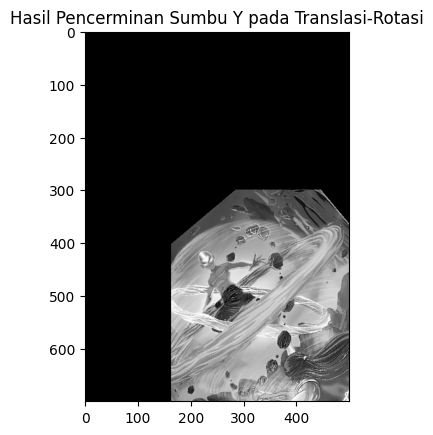

In [128]:
pencerminan = np.zeros((tinggi, lebar)).astype(int)

for i in range(tinggi):
    for j in range(lebar):
        pencerminan[i][j] = translasi_rotasi[i][lebar - j - 1]

plt.title("Hasil Pencerminan Sumbu Y pada Translasi-Rotasi")   
plt.imshow(pencerminan, cmap="gray")
plt.show()

Kode diatas melakukan pencerminan sumbu Y pada citra hasil translasi dan rotasi sebelumnya. Setiap piksel dari citra dipindahkan ke posisi yang bersesuaian dengan pencerminan sumbu Y. Hasilnya ditampilkan menggunakan plt.imshow() dengan peta warna 'gray'.

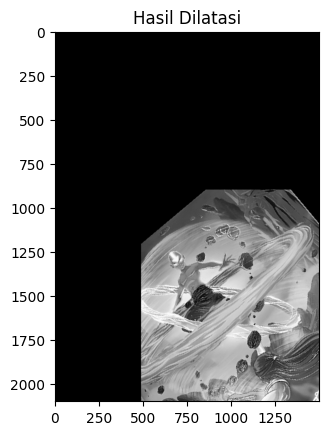

In [129]:
latasi = np.zeros((tinggi*3, lebar*3)).astype(int)
for i in range (tinggi*3) :
    for j in range (lebar*3) :
        tinggibaru = int(tinggi * i / (tinggi*3))
        lebarbaru = int(lebar * j / (lebar*3))
        latasi[i][j] =  pencerminan_y_translasi_rotasi[tinggibaru][lebarbaru]
plt.title("Hasil Dilatasi")                                 
plt.imshow(latasi,cmap="gray")

Kode di atas melakukan dilatasi pada citra yang telah dipencerminan sumbu Y setelah translasi dan rotasi. Setiap piksel dari citra hasil pencerminan sumbu Y translasi-rotasi dipindahkan ke posisi yang bersesuaian dalam citra hasil dilatasi. Hasilnya ditampilkan menggunakan plt.imshow() dengan peta warna 'gray'.